<b>Deutsch-Jozsa Algorithm</b>

In this notebook we will develop Deutsch-Jozsa algorithm, creating a Quantum Circuit that follows this algorithm and testing it with an input example.   
  
For this algorithm, we are given a boolean function f(x), which takes as a input a string of bits, and returns either 0 or 1. To give sense to this algorithm, we need to guarantee that this function f(x) is constant (for any input, function f(x) returns 0 or 1) or balanced (half of the outputs are 0, half others are 1), not anything else.  
  
The main purpose of this algorithm is to demonstrate that quantum computing can solve classical problems faster, and also can solve problems that classical computation cannot.  
  
The classical solution to this problem starts by evaluating f(x) with half of all possible inputs (we will call it n) plus 1 extra case, so (n/2) + 1. That's because, in the worst scenario, for the first n/2 possible inputs, we will see that the output is the same (0 or 1, it doesn't matter), so we will have to look for an extra case to see if this extra output is the same as the others, so this would mean that f(x) is constant, or either we see that this extra output is different from the others, that would mean f(x) is balanced (remember we guaranteed that f(x) is constant or balanced, if it's not constant is balanced).  
  
Now we will see that in quantum solution to this problem, we only have to evaluate f(x) only one time, because we will take advantage of paralellism that quantum computation gives us.  
  
We start by doing an import of all the packages we will need in our code.

In [16]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
import numpy as np

First we are going to see the details of this algorithm to understand the process and which type of gates are we going to use in our circuit.  
  
<img src="https://qiskit.org/textbook/ch-algorithms/images/deutsch_steps.png" alt="Alternative text" />  
  
First, we have two registers, first is to place the input of size n (so we will have n qubits first), and a second register to place the phase oracle result. Phase oracle is the box Uf of the image, and is the circuit that contains the behavior of f(x), so we will have to code the oracle to do exactly what does f(x). The algorithm starts by turning register 2 to state |1>.  
  

Then, we will apply a Hadamart gate to all qubits to get a superposition of all, as this result shows:
  
$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$  
  
Then, when we apply the phase oracle, the second register (we called y) gets a XOR opperation with f(x), getting this result:  
  
$\begin{aligned}
            \lvert \psi_2 \rangle  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle ) 
        \end{aligned}$  
  
As we can see, when we evaluate f(x) with any x, and the result is 0, phase is not modified (it doesn't add a negative phase to the state), but if the result is 1, it adds a negative phase to the state. When f(x) is constant, our oracle doesn't add any negative phase, but if f(x) is balanced, the oracle adds a negative phase exactly half of all possible inputs. 
  
Finally, we apply a Hadamart gate to all qubits on the first register (all n qubits except the last, which we will ignore), and we measure it. If we obtain 100% of chance to obtain all 0, f(x) is constant, otherwise is balanced.  
  
Note that, if f(x) is constant, as we don't add any negative phase, Hadamart gates cancell each other and we obtain finally the same state as the initial.

To give a full example, we will create a balanced function f(x0, x1), that does the XOR between x0 and x1. We can see that we have 4 possible values for x0,x1:  
  

f(0,0)=0  
f(0,1)=1  
f(1,0)=1  
f(1,1)=0  
  
And we can guarantee this balanced behavior by placing a CNOT gate for every input qubit we have.  
  
To complete the example, we will take 3 bits as input of f(x) -> f(x0,x1,x2).

In [17]:
phase_oracle = QuantumCircuit(4)

And we will define a string bit that will be the input of the function. As a example, we will take x0 = 1, x1 = 0, x2 = 1, but it doesn't matter as we want to prove that the algorithm will return the correct result, because we don't care about the result of the function, we want to see if it's balanced or constant.

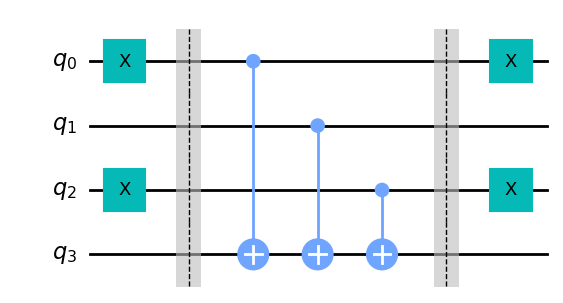

In [18]:
input_string = '101'

'''We place X gate on qubit 0 and 2 to make 101 the input'''
phase_oracle.x([0,2])
phase_oracle.barrier()
phase_oracle.cx(0,3)
phase_oracle.cx(1,3)
phase_oracle.cx(2,3)
phase_oracle.barrier()
'''we undo X gates'''
phase_oracle.x([0,2])

phase_oracle.draw(output='mpl')

Now, we will build the full algorithm, joining the rest of the algorithm with the phase oracle we created above.

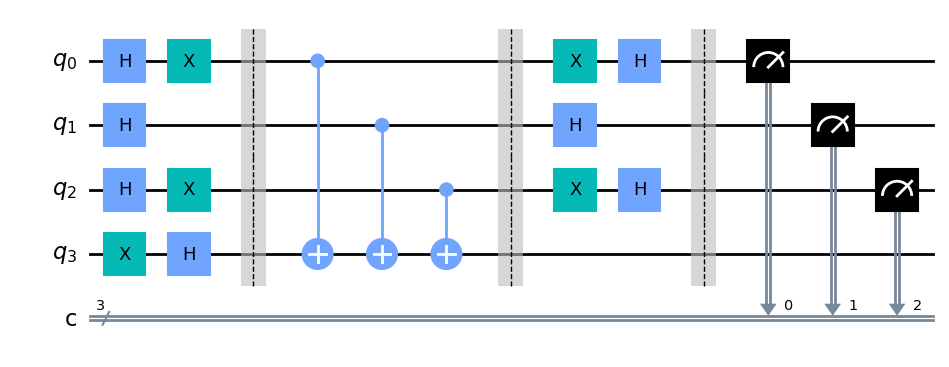

In [19]:
algorithm = QuantumCircuit(4,3)
algorithm.x(3) # place X gate to put qubit 3 in state |->
algorithm.h([0,1,2,3])

algorithm = algorithm.compose(phase_oracle) # join the phase oracle

algorithm.h([0,1,2])
algorithm.barrier()
algorithm.measure([0,1,2],[0,1,2])

algorithm.draw(output='mpl')

And finally we will compile and execute the circuit in a simulator to see the result we obtain.

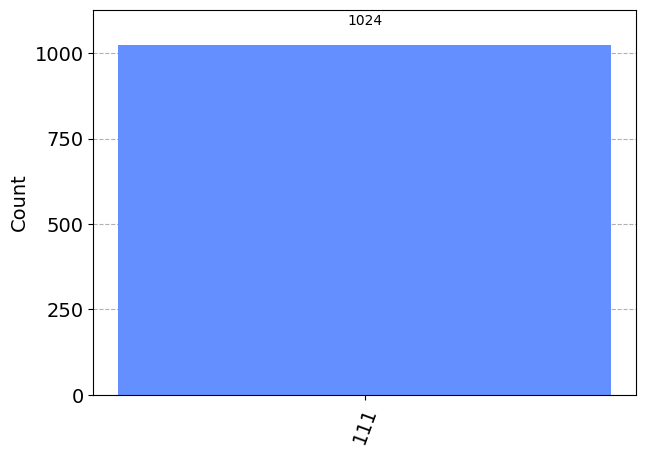

In [22]:
simulator = Aer.get_backend('aer_simulator')
qobj = assemble(algorithm)
histogram = simulator.run(qobj).result().get_counts()
plot_histogram(histogram)

And we can see that the result is 111, that is different from 000 that we would obtain if f(x) is constant, so the circuit works perfectly!

Pending to show case when f(x) is constant